# This ia the first task of Code Soft intership

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# importing the dataset from - https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb

train_path = "Genre Classification Dataset/train_data.txt"
movies=pd.read_csv(train_path,sep=':::', header=None, names=['title','genre','description'],engine='python')

test_path="Genre Classification Dataset/train_data.txt"
movies_test=pd.read_csv(test_path,sep=':::', header=None, names=['title','genre','description'],engine='python')

## Exploratory data analysis

#### Data visualization

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


There are movies of 27 genres in the database
genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64


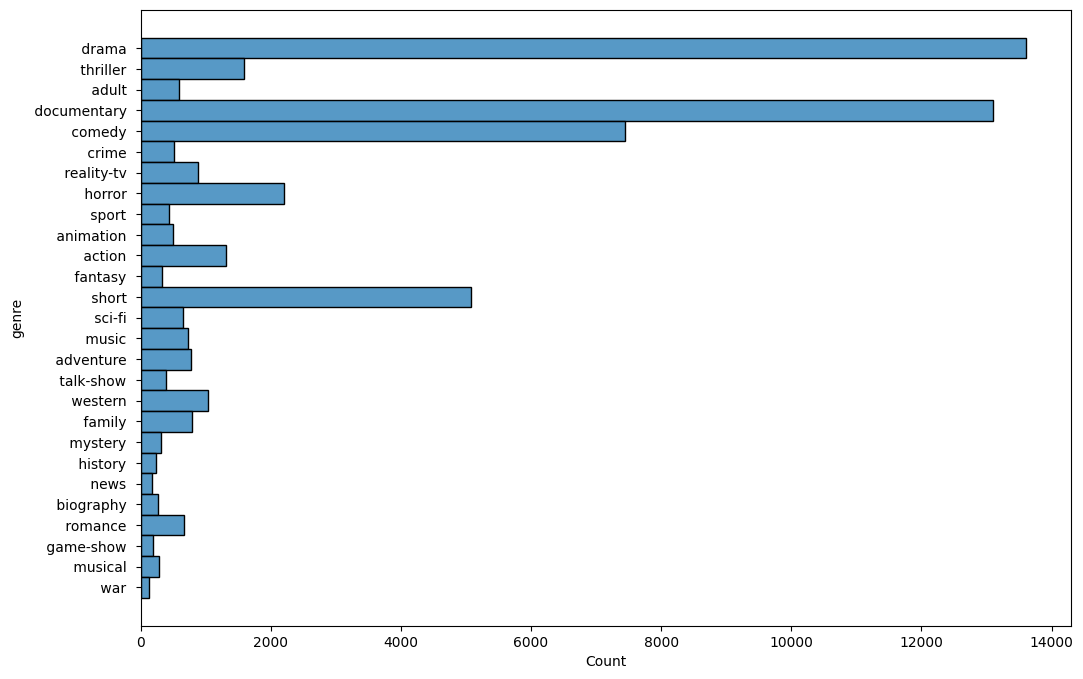

In [11]:
plt.figure(figsize=(12,8))
sns.histplot(movies,y='genre')
print("There are movies of {} genres in the database".format(movies.loc[:,"genre"].nunique()))
print(movies.genre.value_counts())

'''
This concludes that the data has no null values.
However the data is unbalanced, there are significantly more "drama", "documentary", "comedy" and "short" movies in comparison to the remaining genres.
'''

#### Data cleaning

In [22]:
movies['description'].iloc[0]

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In above example the description contains characters like 10, - ,etc. And stopwords like the, a, an,etc.
These characters does not provide a useful outcome for us, so we will remove and replace these characters with a space character.

In [29]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import re

space = re.compile('[/(){}\[\]\|@,;]')
symbols = re.compile('[^0-9a-z #+_]')
stopwords = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = space.sub(' ', text) 
    text = symbols.sub('', text)  
    text = re.sub(r'[0-9]+','',text) #delete one or more digit ocurrences
    text = ' '.join(word for word in text.split() if word not in stopwords) # delete stopwords from text
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aaditya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/aaditya/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
#Check the amount of characters of all the original descriptions
movies['description'].apply(lambda x: len(x.split(' '))).sum()

5578969

In [26]:
#Clean descriptions of non-alphabetical characters
movies['description'] = movies['description'].apply(clean_text)
#Check the amount of characters of all the cleaned descriptions
movies['description'].apply(lambda x: len(x.split(' '))).sum()

3085742

In [27]:
# Our previous example
movies['description'].iloc[0]

'listening conversation doctor parents yearold oscar learns nobody courage tell weeks live furious refuses speak anyone except straighttalking rose lady pink meets hospital stairs christmas approaches rose uses fantastical experiences professional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blue'

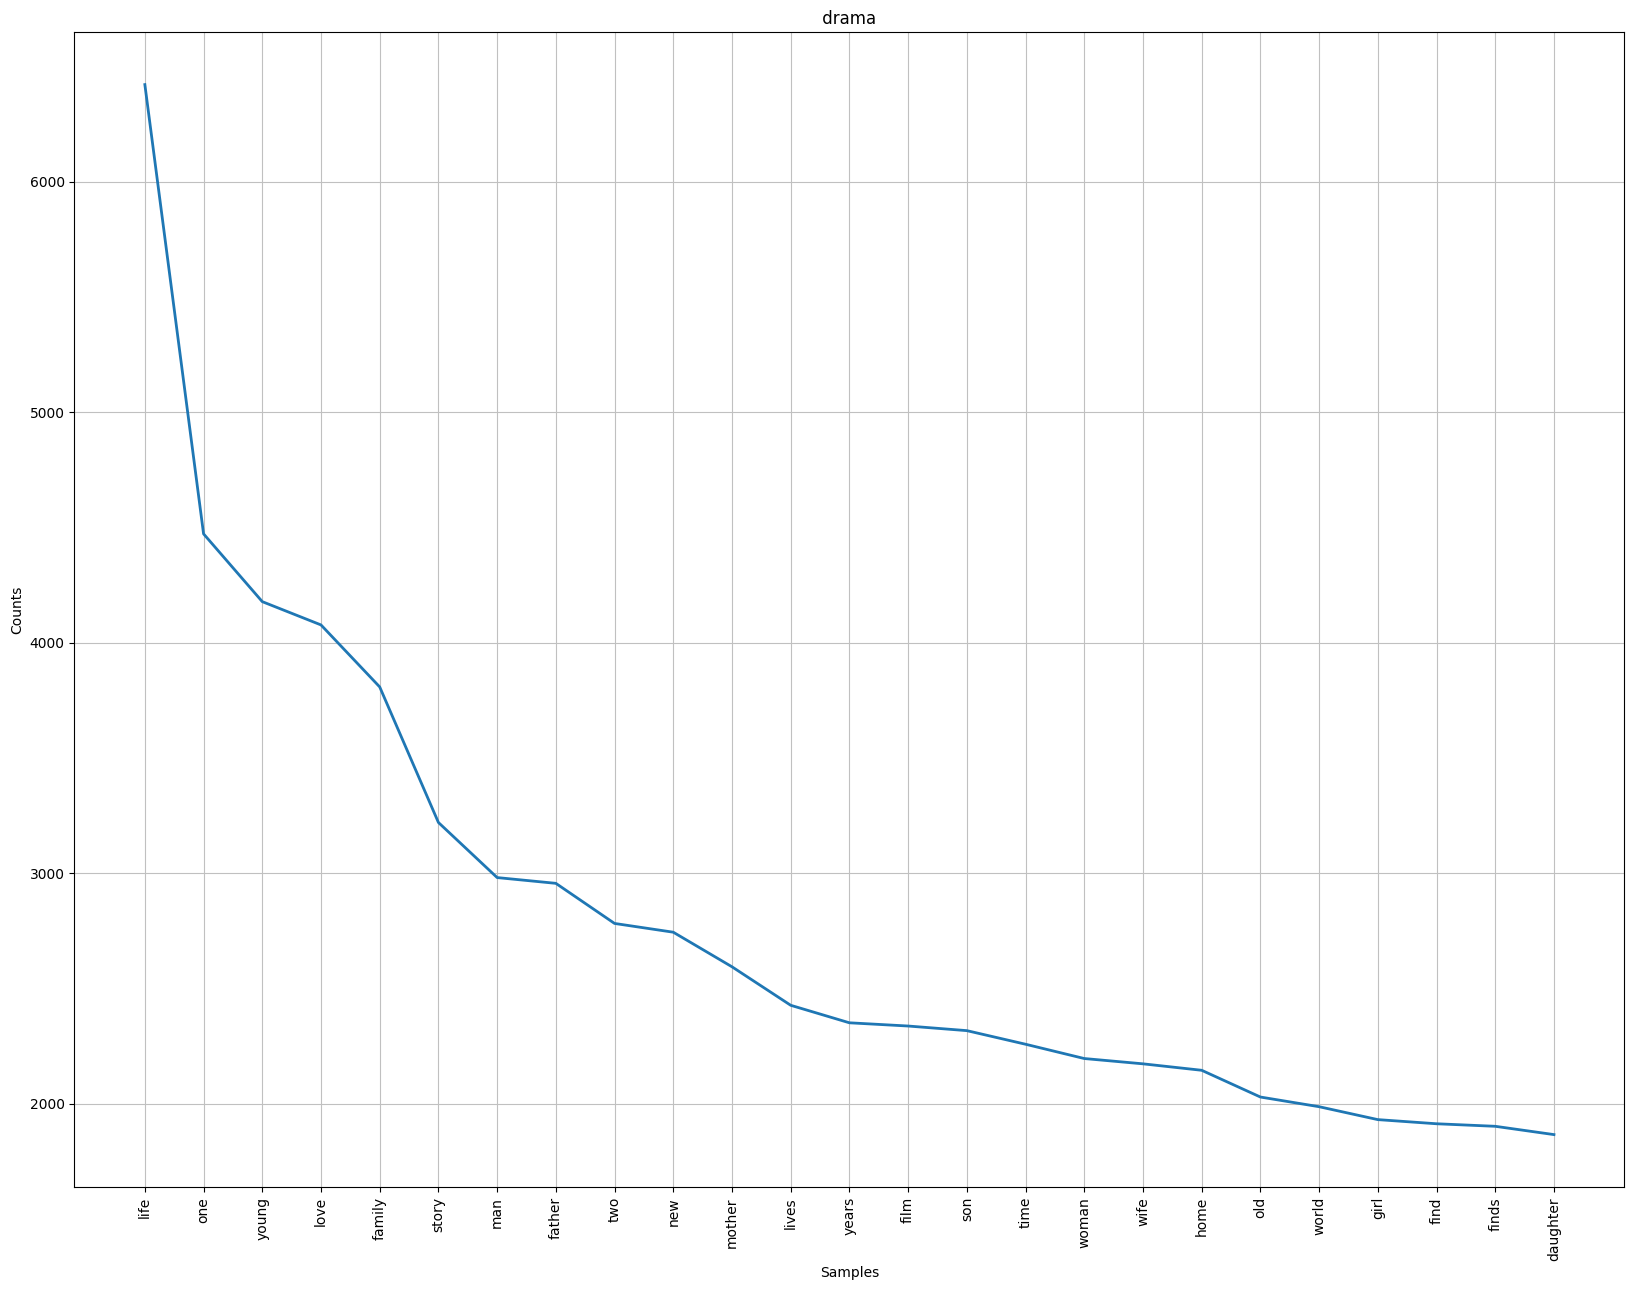

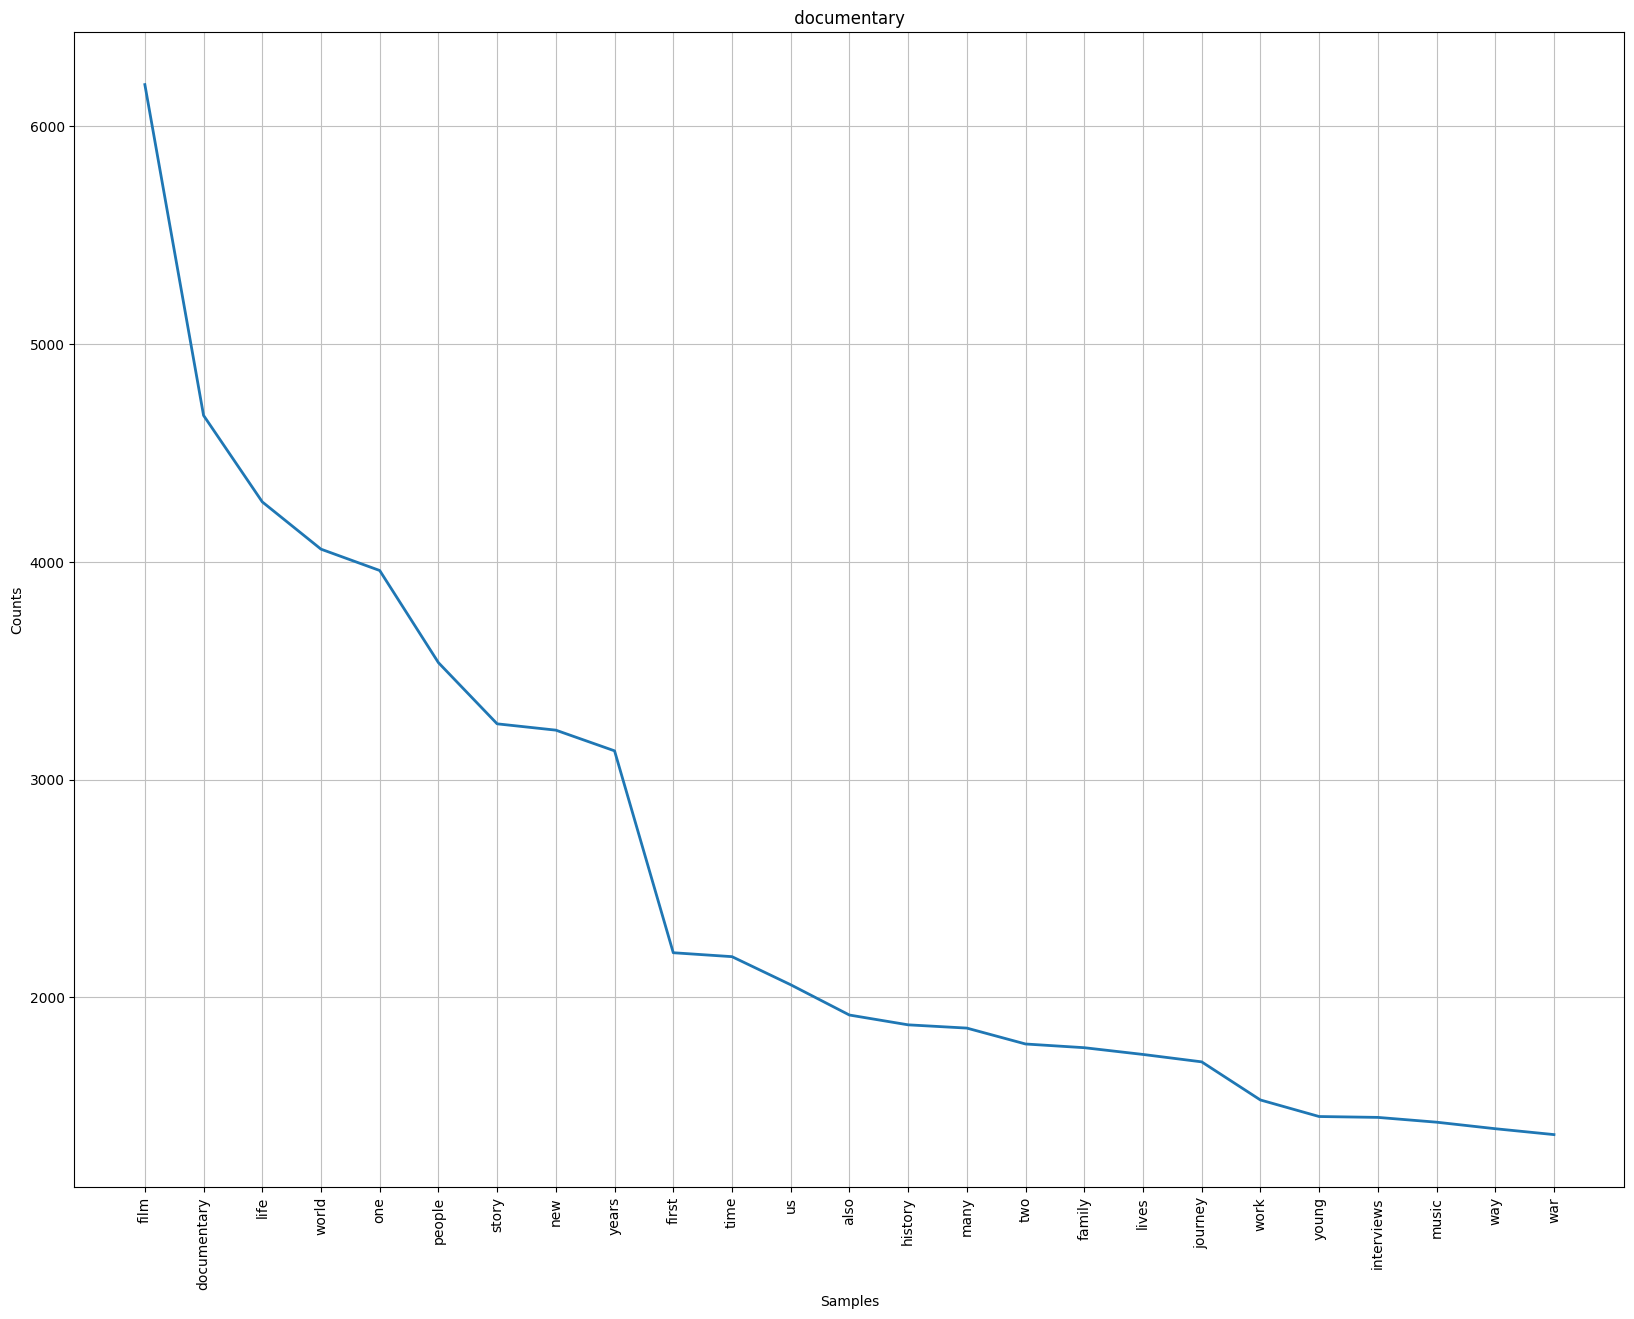

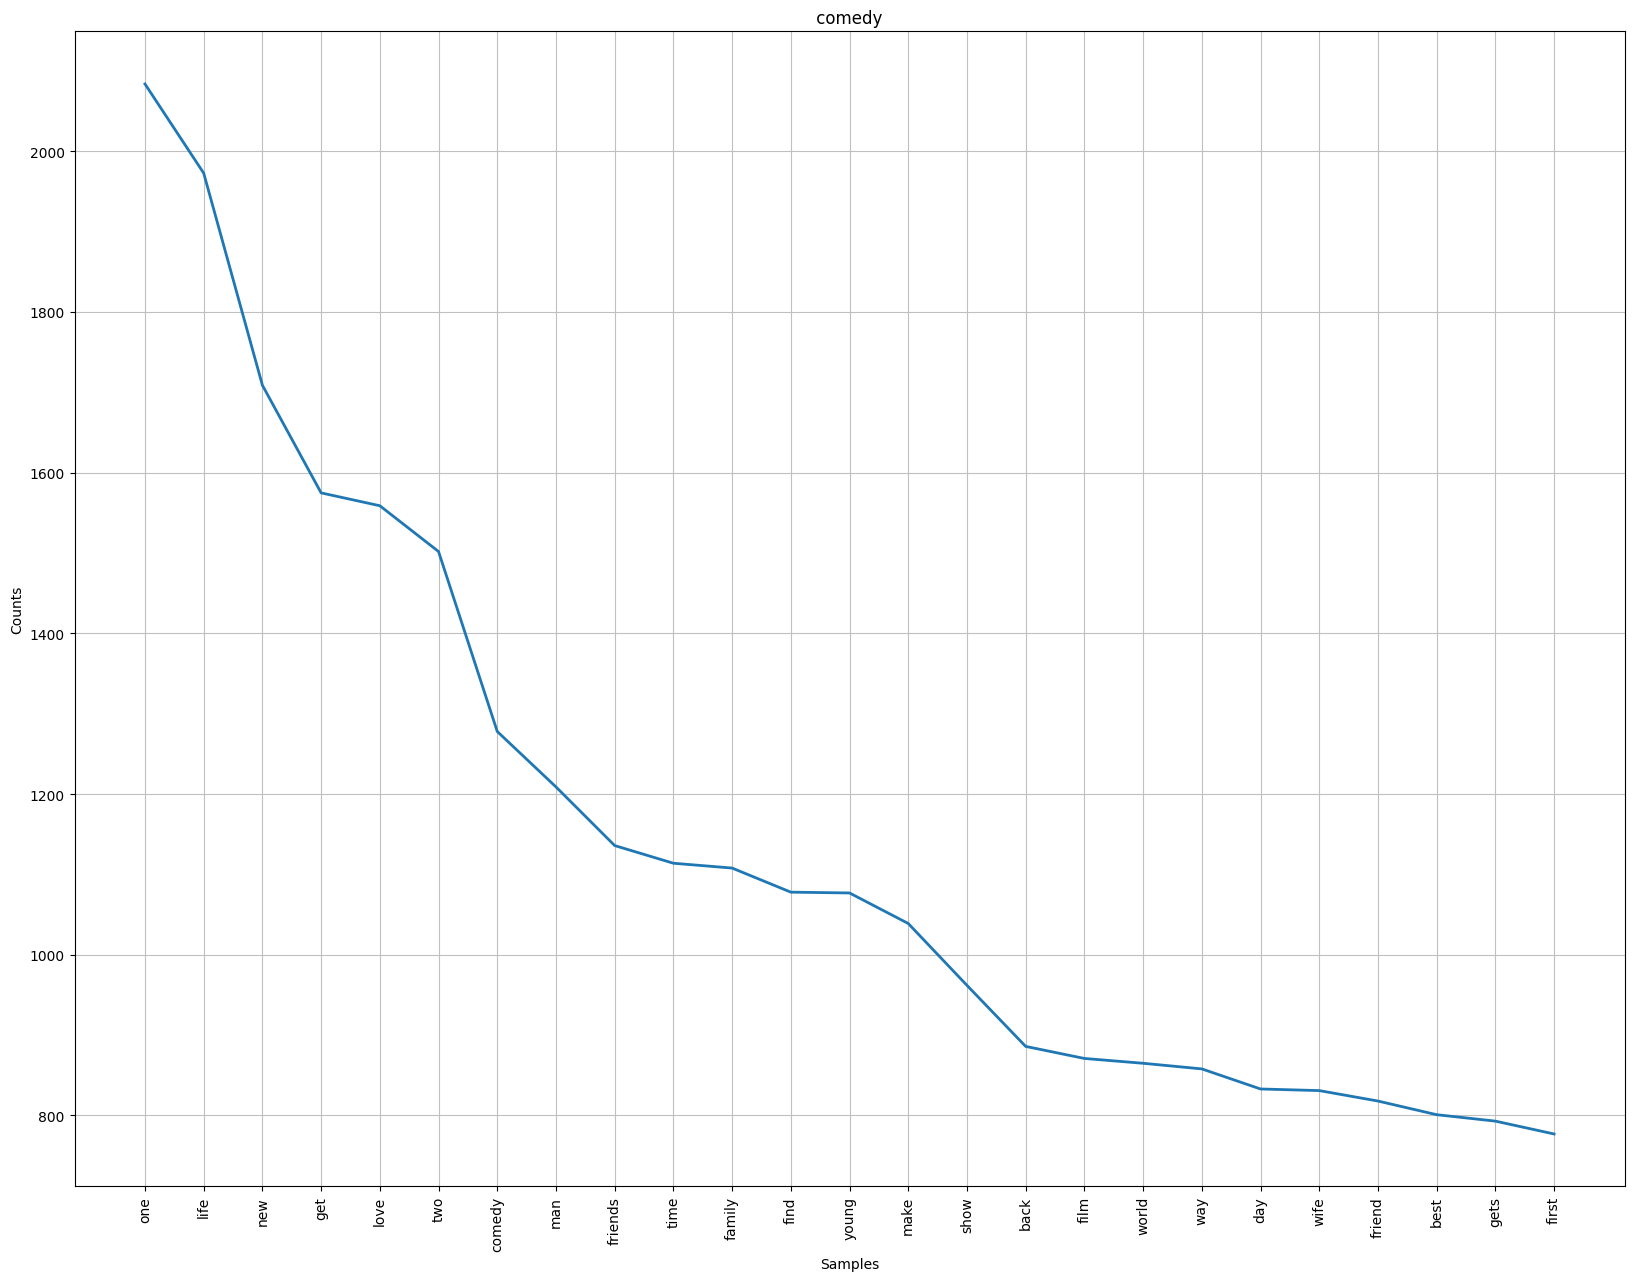

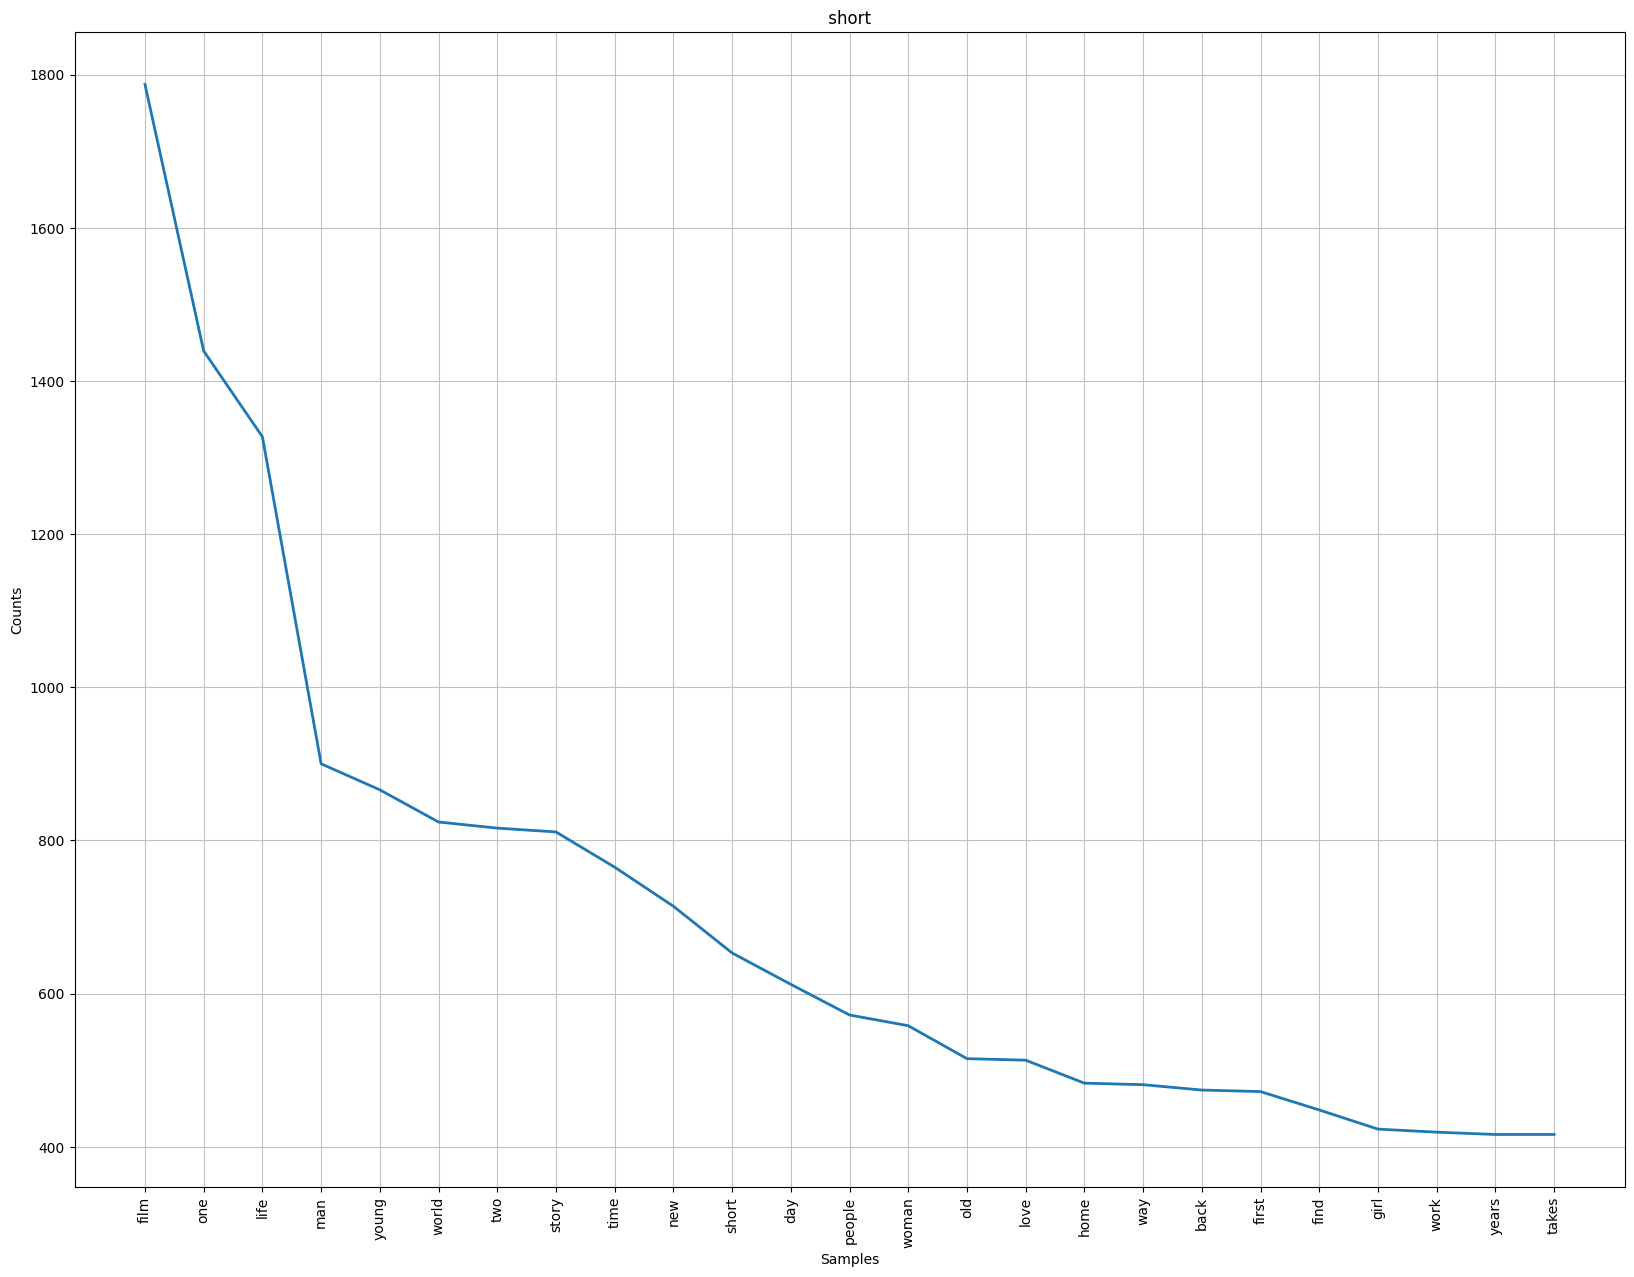

In [49]:
# We plot graph of the 25 most common words of top 4 genre's descriptions to get a sense of how they are related to each genre

genres=movies.genre.value_counts().keys().tolist()

for genre in genres[0:4]:
    gen_data=movies.description.loc[movies.genre==genre]
    desc = gen_data.str.cat(sep=' ')
    tokens = word_tokenize(desc)
    vocabulary = set(tokens)
    frequency_dist = nltk.FreqDist(tokens)
    plt.figure(figsize=(20,15))
    frequency_dist.plot(25,title=genre)

Concluding, in the top 4 genre the most words use are:
- For Drama : life
- For Documentary : film
- For Comedy : one
- For Short : film